In [ ]:
#librerias
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Users\Patri\AppData\Local\Tesseract-OCR\tesseract.exe'

In [ ]:
#un par de funciones (repetidas de 'tomar img, limpiar, bounding boxes y escalar' y
#'escalado y limpiado de img dada la bounding box')

def get_boxes(img,ampliar=1,plot=False,grilla=False):
#dada una img, separa los caracteres cada uno en otra image.
#el 'ampliar' es xq a veces, tesseract hace las boxes muy pegadas al caracter.
#Puede servir ponerlo en 1.2, 1.5 aprox
    chars_img = []
    temp = []
    boxes = tess.image_to_boxes(img, lang="eng+equ")
    h, w = img.shape
    for b in boxes.splitlines():
        b = b.split(' ')
        x1,x2,y1,y2 = box_params(h,w,b,ampliar)
        temp = np.copy(img[x1:x2,y1:y2])
        chars_img.append(temp)
    if plot==True:
        plot_img(img)  
        plot_subimg(chars_img,grilla=grilla)
    return chars_img

def box_params(h,w,b,ampliar):
#es llamado por get_boxes. Prepara los x,y de las bounding boxes
#b es un vector con strings tipo '100', '78',
#que sale de splitear lo que devuelve tess.image_to_boxes
    box_height = (int(b[4])-int(b[2]))*ampliar
    avg_height = ((h-int(b[4]))+(h-int(b[2])))/2
    box_width = (int(b[3])-int(b[1]))*ampliar
    avg_width = (int(b[3])+int(b[1]))/2
    x1 = int(avg_height - box_height/2)
    x2 = int(avg_height + box_height/2)
    y1 = int(avg_width - box_width/2)
    y2 = int(avg_width + box_width/2)
    if x1<0:
        x1=0
    if x2>h:
        x2=h
    if y1<0:
        y1=0
    if y2>w:
        y2=w
    return x1,x2,y1,y2

def plot_img(img):
    #plotea en blanco y negro
    plt.imshow(img,'gray')
    plt.show()
    
def plot_subimg(subimg_array,grilla=False):
    #plotea las img de cada caracter, una abajo de la otra o en un
    #subplot (grilla)
    if grilla==True:
        a = int(np.ceil(np.sqrt(np.shape(subimg_array)[0])))
        i=1
        for image in subimg_array:
            plt.subplot(a,a,i)
            plt.imshow(image,'gray')
            i += 1
        plt.show()
    else:
        for image in subimg_array:
            plt.imshow(image,'gray')
            plt.show()
    

def resize_boxes(h,w,img,write=False,name='prueba1.png'):
    #cambia el tamaño de las img de los caracteres.
    #Write==True las guarda en carpeta.
    out_img = cv.resize(img,(h,w))
    if write==True:
        cv.imwrite(name,out_img)
    return out_img

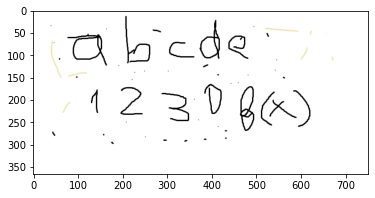

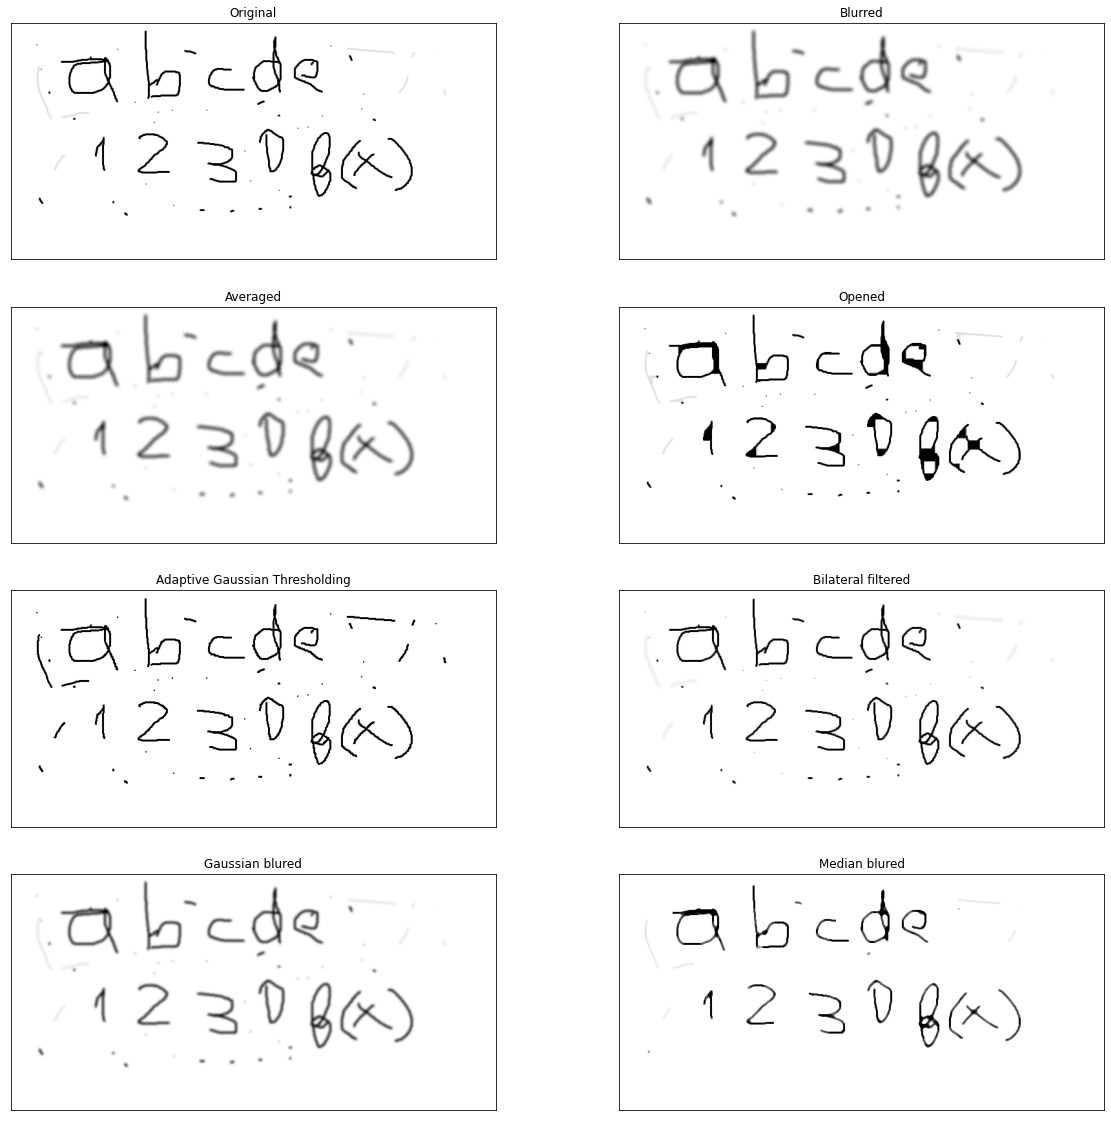

In [ ]:
#importo un paint 'sucio', con unas rayas/puntos hechos a mano
original = cv.cvtColor(cv.imread('paint_sucio.png'),2)
plt.imshow(original)
plt.show()

#lo importo en blanco y negro
original = cv.cvtColor(cv.imread('paint_sucio.png'), cv.COLOR_BGR2GRAY)
#pruebo aplicando distintos filtros de opencv
blur = original
avg = original
opened = original
closed = original
adgauss = original
gblur = original
mblur = original
bilateral = original
kernel = np.ones((5,5),np.float32)/25
# a un par les hago varias (3) iteraciones
for i in range(3):
    blur = cv.blur(blur,(5,5))
    avg = cv.filter2D(avg,-1,kernel)
    gblur = cv.GaussianBlur(gblur,(5,5),0)
    mblur = cv.medianBlur(mblur,5)

opened = cv.morphologyEx(opened, cv.MORPH_OPEN, kernel, iterations = 3)
#closed = cv.morphologyEx(closed, cv.MORPH_CLOSE, kernel, iterations = 3) muy facil que quede todo negro
adgauss = cv.adaptiveThreshold(adgauss,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
bilateral = cv.bilateralFilter(bilateral,9,75,75)

#y los ploteo (bastante picapiedra el codigo pero nevermind)
plt.subplots(figsize=(20, 20))
plt.subplot(421),plt.imshow(original,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.imshow(blur,'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(423),plt.imshow(avg,'gray'),plt.title('Averaged')
plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.imshow(opened,'gray'),plt.title('Opened')
plt.xticks([]), plt.yticks([])
#plt.subplot(325),plt.imshow(closed,'gray'),plt.title('Closed')
#plt.xticks([]), plt.yticks([]) #ni vale la pena plotear este
plt.subplot(425),plt.imshow(adgauss,'gray'),plt.title('Adaptive Gaussian Thresholding')
plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.imshow(bilateral,'gray'),plt.title('Bilateral filtered')
plt.xticks([]), plt.yticks([])
plt.subplot(427),plt.imshow(gblur,'gray'),plt.title('Gaussian blured')
plt.xticks([]), plt.yticks([])
plt.subplot(428),plt.imshow(mblur,'gray'),plt.title('Median blured')
plt.xticks([]), plt.yticks([])
plt.show()

#el que mejor veo es el median blur (el ultimo)

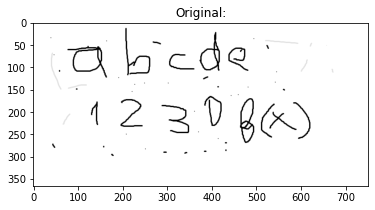

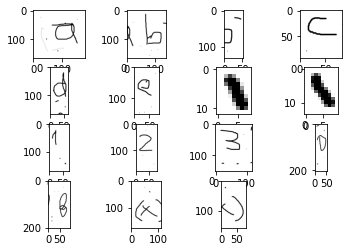

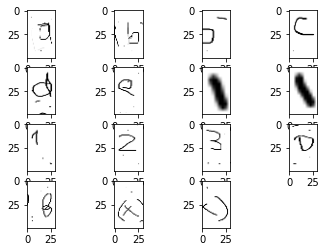

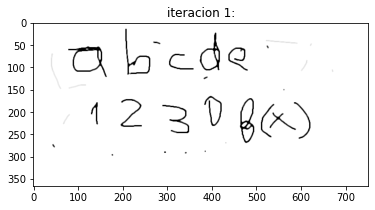

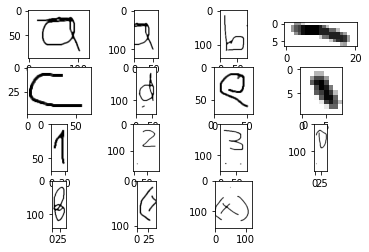

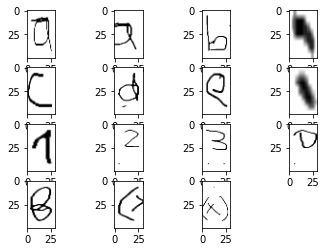

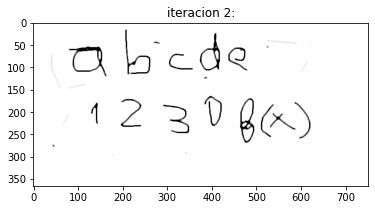

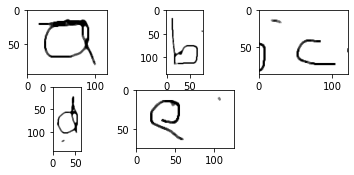

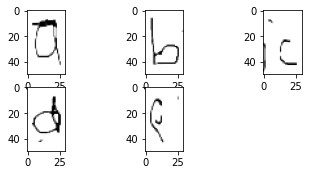

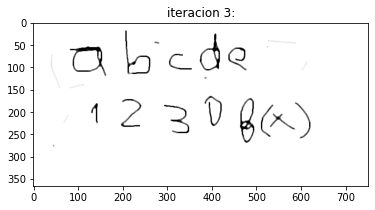

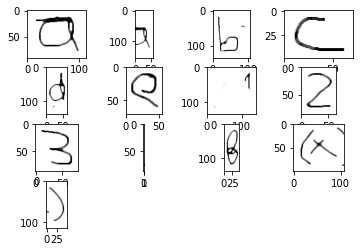

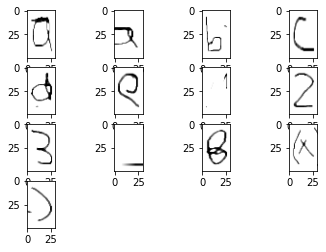

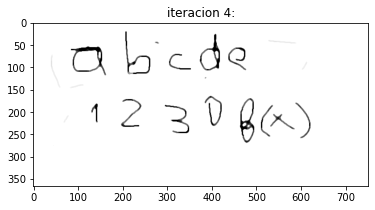

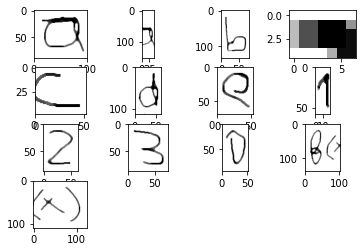

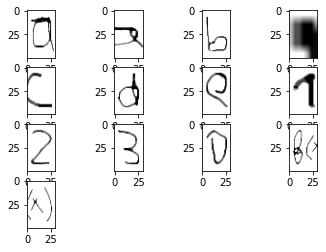

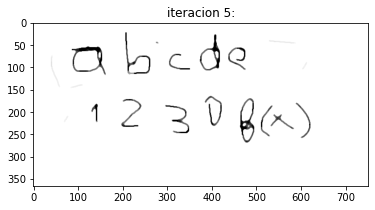

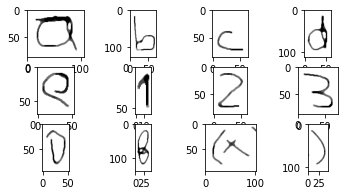

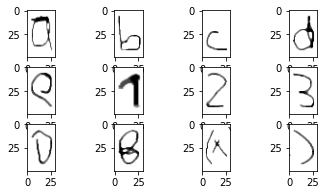

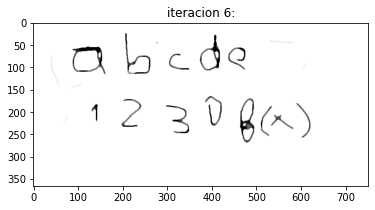

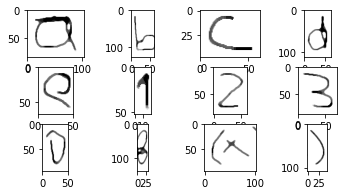

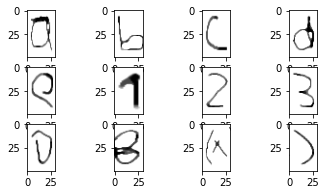

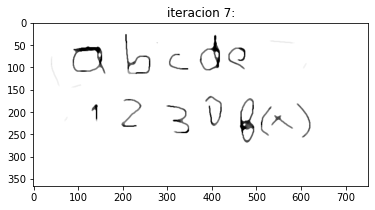

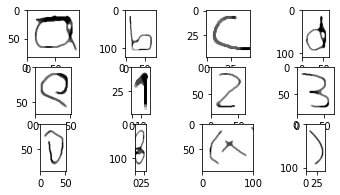

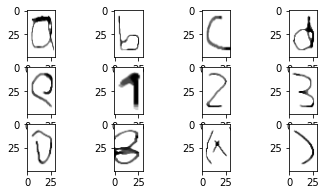

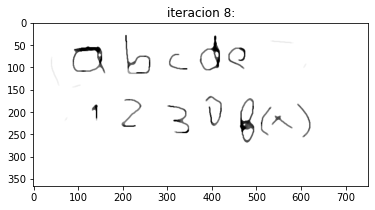

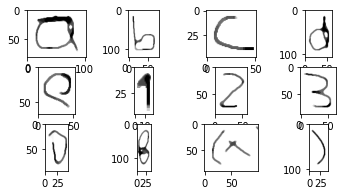

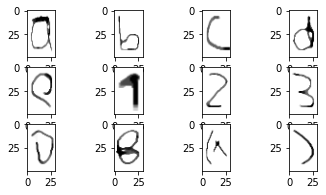

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Users\Patri\AppData\Local\Tesseract-OCR\tesseract.exe'
original = cv.cvtColor(cv.imread('paint_sucio.png'), cv.COLOR_BGR2GRAY)
final = original;
plt.title('Original:')
chars_img = get_boxes(final,1.4,plot=True,grilla=True)
out_img = []
i=1
for char_img in chars_img:
    name= 'caracter'+str(i)+'.png'
    i+=1
    temp = resize_boxes(30,50,char_img,write=False,name=name)
    #guarda que si write=True, te guarda por separado todos los caracteres q encuentra
    out_img.append(temp)
plot_subimg(out_img,grilla=True)
    
for i in range(8):
    final = cv.medianBlur(final,5)
    plt.title(f'iteracion {i+1}:')
    chars_img = get_boxes(final,1.4,plot=True,grilla=True)
    out_img = []
    i=1
    for char_img in chars_img:
        name= 'caracter'+str(i)+'.png'
        i+=1
        temp = resize_boxes(30,50,char_img,write=False,name=name)
        #guarda que si write=True, te guarda por separado todos los caracteres q encuentra
        out_img.append(temp)
    plot_subimg(out_img,grilla=True)

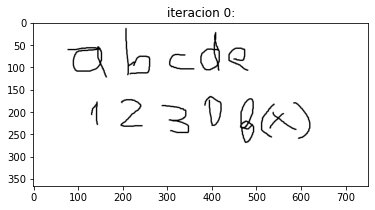

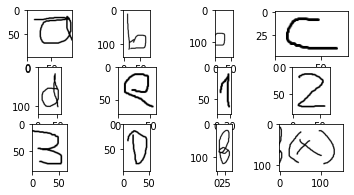

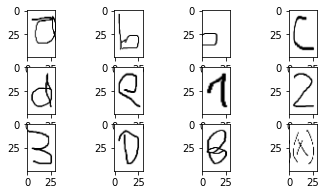

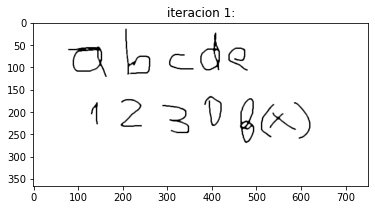

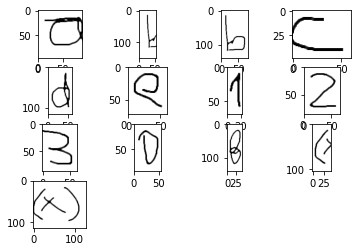

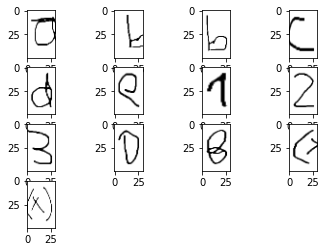

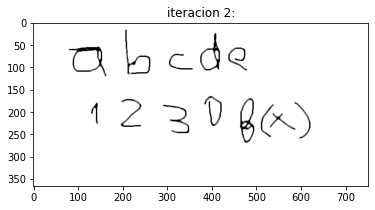

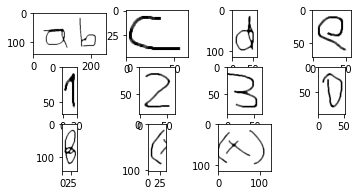

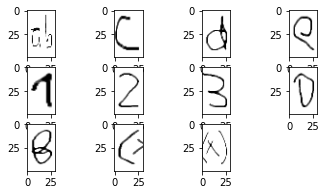

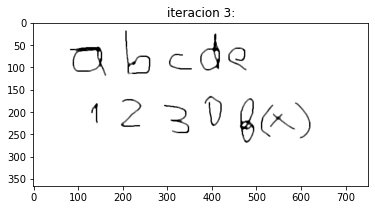

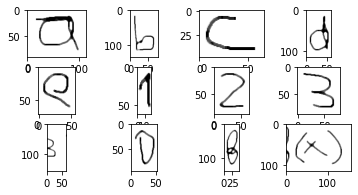

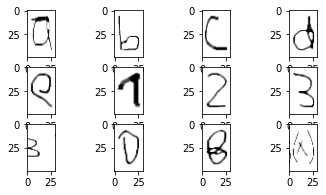

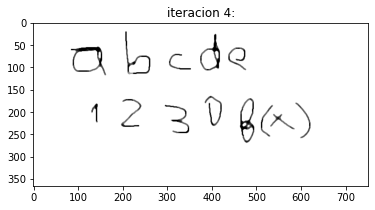

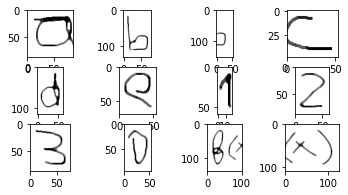

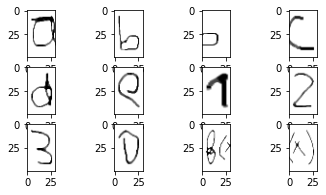

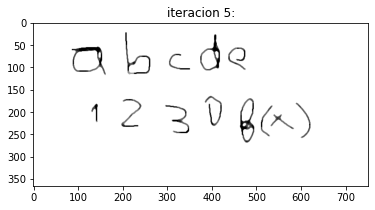

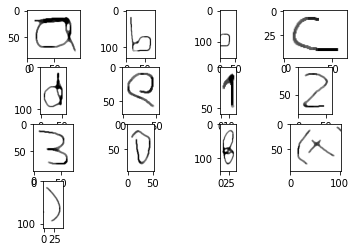

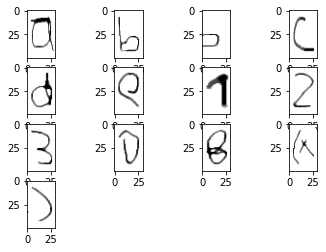

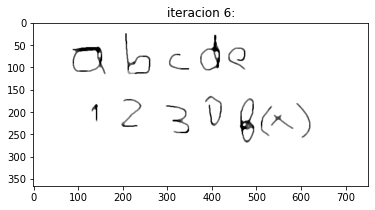

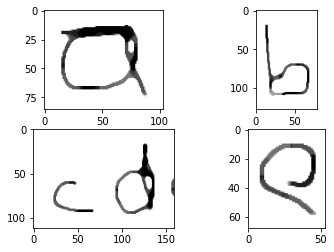

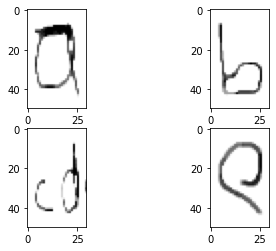

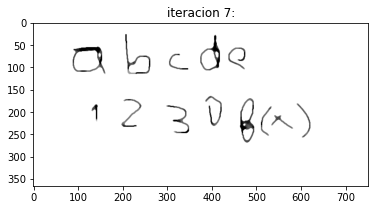

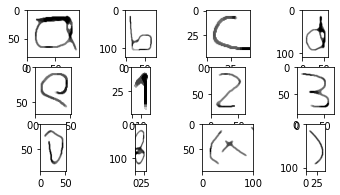

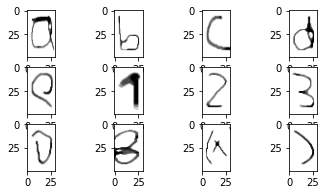

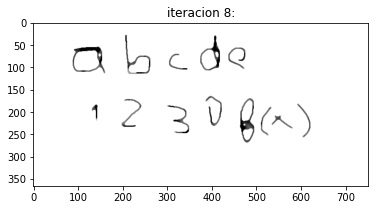

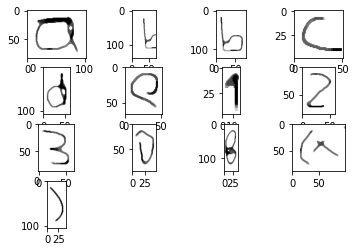

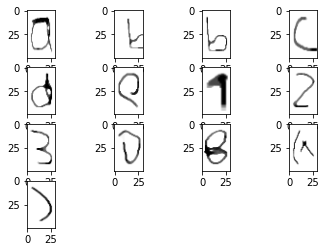

In [ ]:
#so: lo que mejor funciona parece ser la median blur con al menos 5 iteraciones.
#La pruebo sobre la imagen original (sin ruido) para ver que no rompa nada:

imagen = cv.cvtColor(cv.imread('paint1.png'), cv.COLOR_BGR2GRAY)
mblured = imagen
for i in range(9):
    if i>0:
        mblured = cv.medianBlur(mblured,5)
    plt.title(f'iteracion {i}:')
    chars_img = get_boxes(mblured,1.4,plot=True,grilla=True)
    out_img = [] #aca meto las imagenes resizeadas
    i=1
    for char_img in chars_img:
        name= 'caracter'+str(i)+'.png'
        i+=1
        temp = resize_boxes(30,50,char_img,write=False,name=name)
    #guarda que si write=True, te guarda por separado todos los caracteres q encuentra
        out_img.append(temp)
    plot_subimg(out_img,grilla=True)

In [ ]:
#con 6 iteraciones hizo cualquier cosa. Con 7 o sin nada fue con lo que mejor anduvo.
#Conclusion: emmmm es un peligro pero si viene una imagen sucia, se puede probar con 7 iteraciones.